# imports

In [2]:
import pandas as pd
import numpy as np
import datetime
from IPython.core.display import HTML
from IPython.display import Image


# Helper functions

In [1]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


NameError: name 'HTML' is not defined

# load data

In [3]:
df2 = pd.read_csv('../data/df1.csv',low_memory=False,parse_dates=['date'])

In [4]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


In [5]:
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# hyphotheses mind map

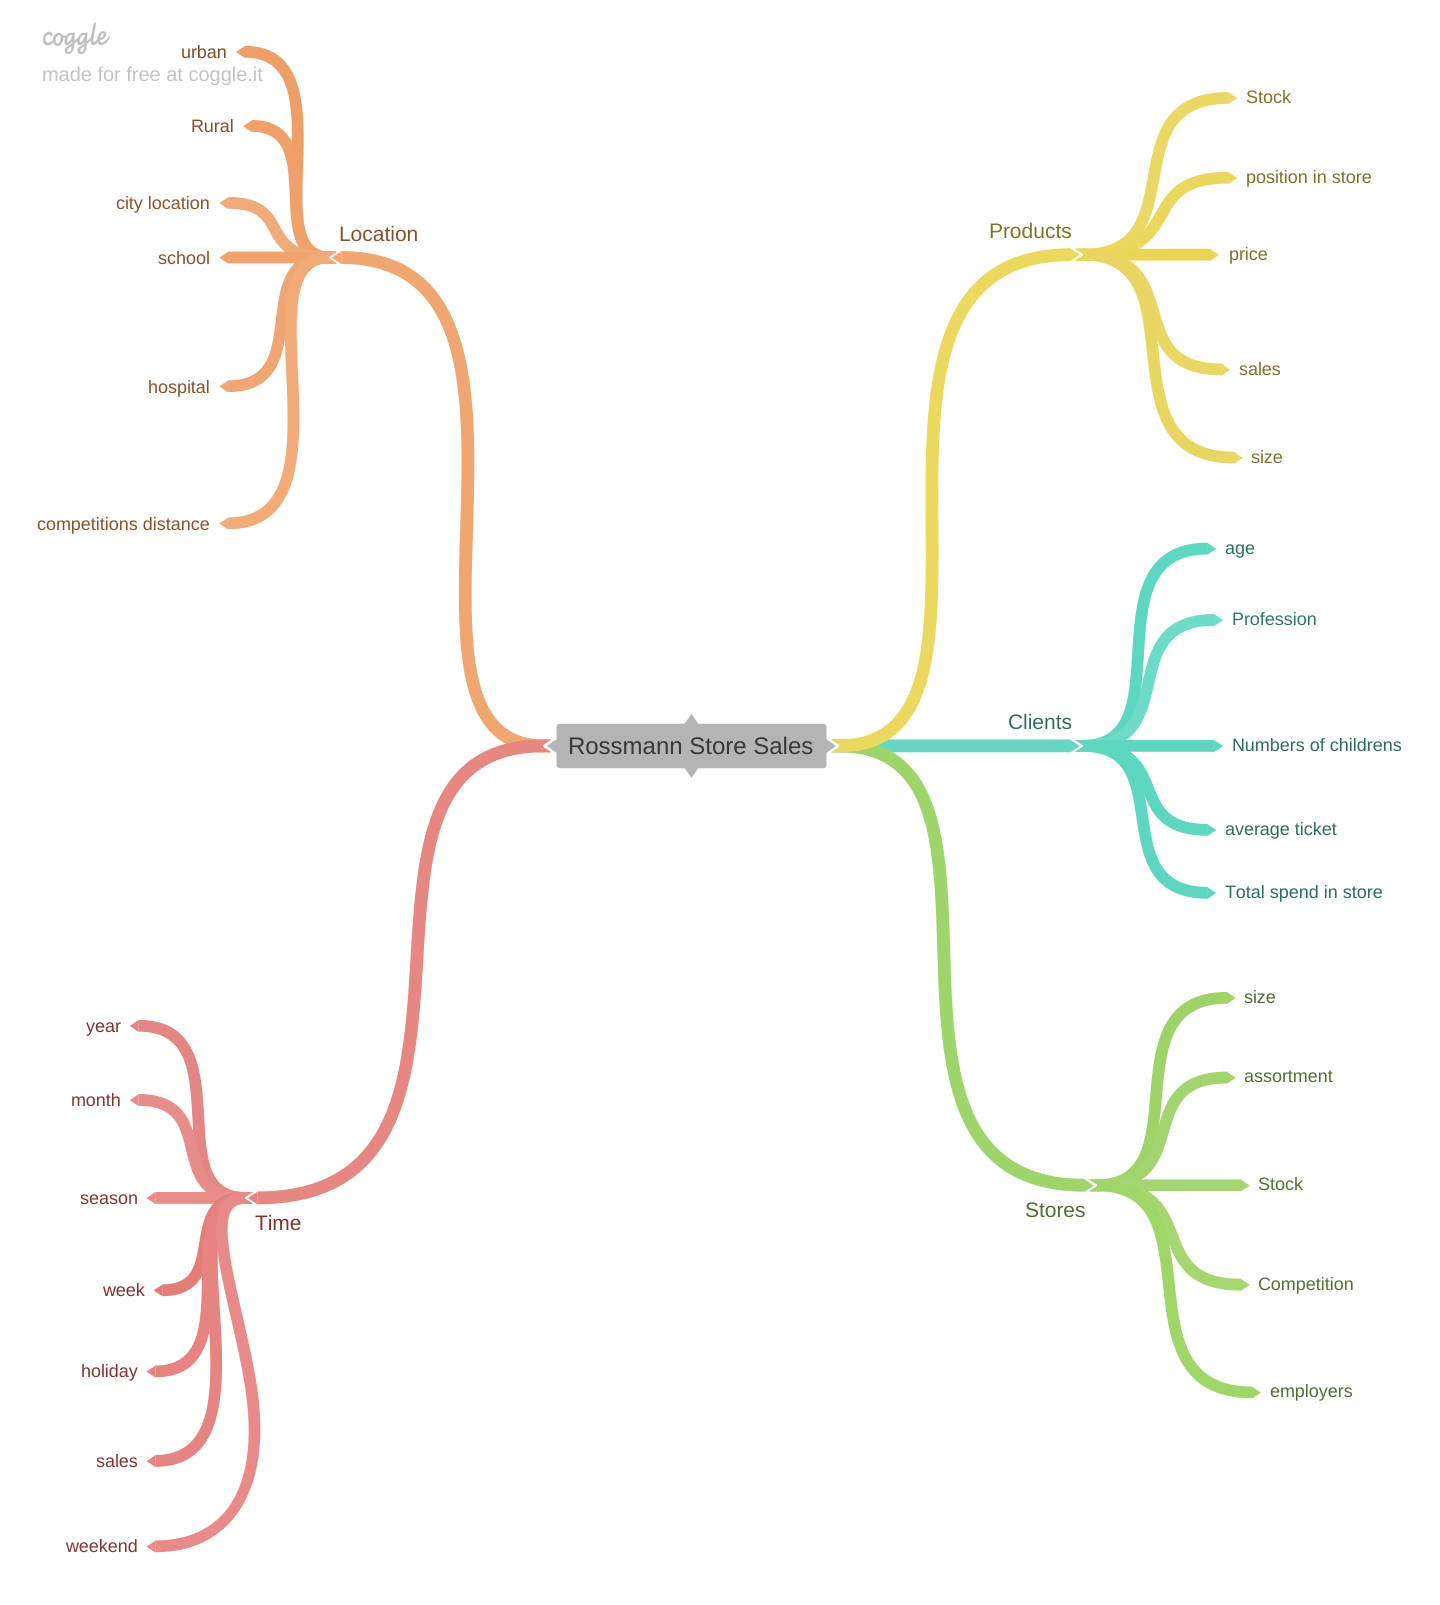

In [91]:
Image('images/Rossmann_Store_Sales.png')

# hypotheses

### Store hypotheses

**h01: Lojas com maior quadro de funcionários vendem mais(x)**

**h02: Lojas com maior stock deveriam vender mais(x)**

**h03: Lojas com maior porte deveriam vender mais(v)**

**h04: Lojas com maior número de funcionários deveriam vender mais(x)**

**h05: Lojas com competidores mais distantes deveriam vender mais(v)**

**h06: Lojas com maior "sortmento" deveriam vender mais(v)**


**h01: Stores with larger staffs sell more(x)**

**h02: Stores with higher stock should sell more(x)**

**h03: Larger stores should sell more(v)**

**h04: Stores with more employees should sell more(x)**

**h05: Stores with more distant competitors should sell more(v)**

**h06: Stores with more "assortment" should sell more(v)**


### Product hypotheses

**h07: Lojas que investem mais em marketing deveriam vender mais(x)**

**h08: Lojas que tem maior exposição na vitrine deveriam vender mais(x)**

**h09: Lojas que tem preços menores nos produtos deveriam vender mais(x)**

**h10: Lojas que tem preços menores deveriam vender mais(x)**

**h11: Lojas com promoções por mais tempo deveriam vender mais(v)**

**h12: Lojas com mais dias de promoção deveriam vender mais(v)**

**h13: Lojas deveriam vender menos durante os feriados escolares(v)**

**h13: Lojas com mais promoções deveriam vender mais(v)**




**h07: Stores that invest more in marketing should sell more(x)**

**h08: Stores that have more window display should sell more(x)**

**h09: Stores that have lower prices on products should sell more(x)**

**h10: Stores that have lower prices should sell more(x)**

**h11: Stores with longer promotions should sell more(v)**

**h12: Stores with more promotion days should sell more(v)**

**h13: Stores should sell less during school holidays(v)**

**h13: Stores with more promotions should sell more(v)**




### Time hypotheses

**h14: Lojas que tem mais feriados deveriam vender menos(v)**

**h15: Lojas que abrem nos primeiros 6 meses deveriam vender mais(v)**

**h16: Lojas que abrem nos finais de semanas deveriam vender mais(v)**

**h17: Lojas vendem mais no inverno(v)**

**h18: Lojas abertas durante o natal deveriam vender mais(v)**

**h19: Lojas deveriam vender mais ao longo dos anos(v)**

**h20: Lojas deveriam vender mais depois do dia 10 de cada mês(v)**

**h21: Lojas com competidores a mais tempo deveriam vender mais(v)**


**h14: Stores that have more holidays should sell less(v)**

**h15: Stores that open in the first 6 months should sell more(v)**

**h16: Stores that open on weekends should sell more(v)**

**h17: Stores sell more in winter(v)**

**h18: Stores open during Christmas should sell more(v)**

**h19: Stores should sell more over the years(v)**

**h20: Stores should sell more after the 10th of each month(v)**

**h21: Stores with longer competitors should sell more(v)**

# Feature engineering

In [92]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%m')

<ipython-input-92-081169dbd36b>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [93]:
# competititon since
comp_sinc = lambda x: datetime.datetime(year=x['competition_open_since_year'],month = x['competition_open_since_month'],day=1)
df2['competition_since'] = df2.apply(comp_sinc,axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)


**"Competition_time_month" tempo desde que a competição começou em meses**

**"Competition_time_month" time since the competition started in months**

In [94]:
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str)+ '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

**"promo_time_week" tempo que a promoção está ativa em semanas**

**"promo_time_week" time the promotion has been active in weeks**

In [95]:
# assortment
assrt = {'a':'basic','b':'extra','c':'extended'}
df2['assortment']= df2['assortment'].replace(assrt)

In [96]:
# state_holiday
sta_hol = { 'a':'public_holiday', 'b':'easter_holiday', 'c': 'christmas', '0':'regular_day'}
df2['state_holiday'] = df2['state_holiday'].replace(sta_hol)

In [6]:
# season
winter_month = [12,1,2]
spring_month = [3,4,5]
summer_month = [6,7,8]
fall_month = [9,10,11]
df2['season'] = df2['month'].apply(lambda x: 'winter' if  x in winter_month else 
                                  ('spring' if x in spring_month else
                                   ('summer' if x in summer_month else
                                    ('fall' if x in fall_month else 'NA'))))

KeyError: 'month'

# Variable Filtering

In [98]:
df3 = df2.copy()

In [99]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week', 'season'],
      dtype='object')

## rows

In [100]:
df3 = df3[(df3['open']!=0) & (df3['sales']>0)]

**Selecionar apenas as linhas que as lojas estavam abertas e que houve vendas**

**Select only the rowns that the stores are open and those that have sales**

## Columns

In [101]:
cols_drop = ['customers','open','promo_interval', 'month_map']
df3.drop(columns=cols_drop,inplace=True)

**Descartar as colunas que não nos interresam mais**

**Drop the columns that aren't more useful**

# Rechecking data types

In [102]:
df3.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
year                                     int64
month                                    int64
day                                      int64
week_of_year                             int64
year_week                               object
competition_s

In [103]:
#df3.to_csv('../data/df3.csv',index=False)